In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

# Autocorrelate Function

In [23]:
# def autocorrelate(syg, tau=0):
#     N = len(syg)

#     syg_2 = np.zeros(3*N-2, dtype = 'float')
#     syg_2[N-1:2*N-1] = np.copy(syg)

#     syg_1 = np.zeros(3*N-2, dtype= 'float')
#     syg_1[N+tau:tau+2*N] = np.copy(syg)
    
#     return np.dot(syg_1, syg_2)

def auto_corr_for_tau(syg, low=-10, high=10, normed=True):
    tau = np.arange(low, high)

    f_corr = np.zeros(len(tau))
    norm = autocorrelate(syg)

    for index, t in enumerate(tau):
        f_corr[index] = covar(syg, syg, t)

    if normed:
        f_corr /= norm

    return tau, f_corr

def covar(syg_1,syg_2, tau=0):
    if syg_1.shape != syg_2.shape:
        raise ValueError("Can't compare size %d with %d"%(syg_1.shape, syg_2.shape))
    
    N = len(syg_1)

    _syg_2 = np.zeros(3*N-2, dtype = 'float')
    _syg_2[N-1:2*N-1] = np.copy(syg_2)

    _syg_1 = np.zeros(3*N-2, dtype= 'float')
    _syg_1[N+tau:2*N + (tau-1)] = np.copy(syg_1)
    
    
    return np.dot(_syg_1, _syg_2)

def corr(x, y, K):
    x = np.array(x)
    y = np.array(y)
    
    N = len(x)
    K = np.arange(K)

    corr = np.zeros(N)
    for j, k in enumerate(K):
        co = 0
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        for i in range(N - k):
            co += (x[i + k] - x_mean) * (y[i] - y_mean)
        corr[j] = co
    
    return corr

def auto_covar(syg_1, syg_2, normed=True):
    if syg_1.shape != syg_2.shape:
        raise ValueError("Can't compare size %d with %d"%(syg_1.shape, syg_2.shape))
    
    low = -len(syg_1)
    high = len(syg_1) - 1
     
    tau = np.arange(low, high)

#     syg_1 -= np.mean(syg_1)
#     syg_2 -= np.mean(syg_2)
    
    f_corr = np.zeros(len(tau))
    norm = np.std(syg_1) * np.std(syg_2)
    
    if np.array_equal(syg_1, syg_2):
        norm2 = covar(syg_1,syg_2)
        print(norm, norm2, norm2/norm, norm == norm2)

    for index, t in enumerate(tau):
        f_corr[index] = covar(syg_1, syg_2, t)

    if normed:
        f_corr /= norm

    return tau, f_corr


def covar(x,y,k=0):
    #raise len(x) == len(y)
    N = len(x)
    _x = x[k:] - np.mean(x[k:])
    _y = y[:N-k] - np.mean(y[:N-k])
    _x = _x.reshape(len(_x))
    _y = _y.reshape(len(_y))
    print(_x.shape)
    print(_y.shape)
    
    print(_x, _y)
    return np.dot(_x, _y)

def auto_covar_for_tau(x, y, tau=0, normed=True):
    print(tau)
    tau = list(range(-tau, tau+1))
    print(tau)
    covars = np.zeros(len(tau))
    for i,t in enumerate(tau):
        covars[i] = covar(x,y,i)
        
    return tau, covars
        
def auto_corr_for_tau(syg, tau=0, normed=True):  
    return auto_covar_for_tau(syg, syg, tau, normed)

In [24]:
t = np.arange(0, 2, 1/32)
x = np.sin(2 * np.pi * 1 * t)
print(t,x)

[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875 1.      1.03125 1.0625  1.09375
 1.125   1.15625 1.1875  1.21875 1.25    1.28125 1.3125  1.34375 1.375
 1.40625 1.4375  1.46875 1.5     1.53125 1.5625  1.59375 1.625   1.65625
 1.6875  1.71875 1.75    1.78125 1.8125  1.84375 1.875   1.90625 1.9375
 1.96875] [ 0.00000000e+00  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  1.22464680e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8.31469612e-01
 -7.07106781e-01 -5.55570233e-0

3
[-3, -2, -1, 0, 1, 2, 3]
(64,)
(64,)
[ 2.16840434e-18  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  1.24633084e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8.31469612e-01
 -7.07106781e-01 -5.55570233e-01 -3.82683432e-01 -1.95090322e-01
 -2.42760955e-16  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  3.69562444e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8

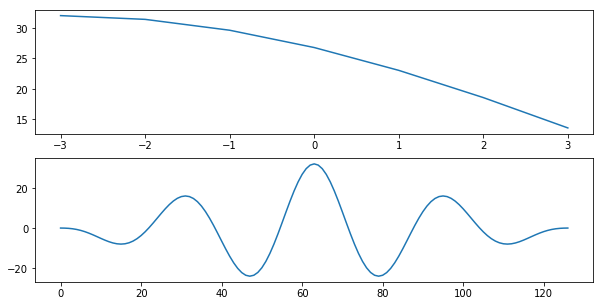

0
[0]
(64,)
(64,)
[ 2.16840434e-18  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  1.24633084e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8.31469612e-01
 -7.07106781e-01 -5.55570233e-01 -3.82683432e-01 -1.95090322e-01
 -2.42760955e-16  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  3.69562444e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8.31469612e-01
 -7.071

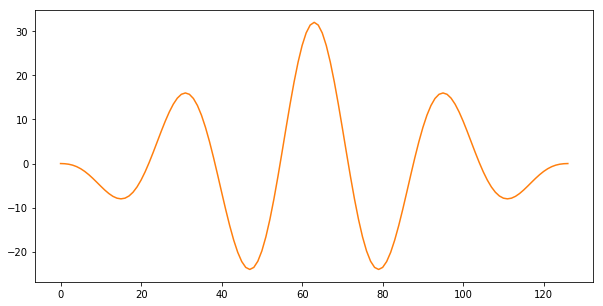

In [25]:
plt.figure(figsize=((10,5)))

plt.subplot(2,1,1)
plt.plot(*auto_covar_for_tau(x,x,3))

plt.subplot(2,1,2)
plt.plot(np.correlate(x, x, 'full'))
plt.show()

plt.figure(figsize=((10,5)))
plt.plot(*auto_corr_for_tau(x, normed=False))
plt.plot(np.correlate(x, x, 'full'))
plt.show()

In [26]:
a = np.array([1,2,3])
print(*auto_covar_for_tau(a,a,2))

2
[-2, -1, 0, 1, 2]
(3,)
(3,)
[-1.  0.  1.] [-1.  0.  1.]
(2,)
(2,)
[-0.5  0.5] [-0.5  0.5]
(1,)
(1,)
[0.] [0.]
(0,)
(0,)
[] []
(0,)
(2,)
[] [-0.5  0.5]


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: shapes (0,) and (2,) not aligned: 0 (dim 0) != 2 (dim 0)

In [ ]:
print(corr(np.array([1,2,3]), np.array([-1, -2, -3]), 2))

In [87]:
def covar(syg_1, syg_2, tau=0):
    
    if syg_1.shape != syg_2.shape:
        raise ValueError("Can't compare size %d with %d"%(syg_1.shape, syg_2.shape))
    
    syg_1 = syg_1 - np.mean(syg_1)
    syg_2 = syg_2 - np.mean(syg_2)
    
    N = len(syg_1)

    _syg_2 = np.zeros(3*N-2, dtype = 'float')
    _syg_2[N-1:2*N-1] = np.copy(syg_2)

    _syg_1 = np.zeros(3*N-2, dtype= 'float')
    _syg_1[N+(tau-1):2*N + (tau-1)] = np.copy(syg_1)
    
    return np.dot(_syg_1, _syg_2) / (N-1)

def auto_corr_for_tau(syg, normed=False):
    
    tau = np.arange(-len(syg)+1, len(syg))
    f_corr = np.zeros(len(tau))
#     norm = covar(syg, syg)

    for index, t in enumerate(tau):
        f_corr[index] = covar(syg, syg, t)

    if normed:
        f_corr /= norm

    return tau, f_corr

def auto_covar(syg_1, syg_2, normed=False):
    tau = np.arange(-len(syg_1)+1, len(syg_1))
    f_corr = np.zeros(len(tau))

    for index, t in enumerate(tau):
        f_corr[index] = covar(syg_1, syg_2, t)

    return tau, f_corr

print(auto_corr_for_tau(a))

np.correlate(a - np.mean(a), a - np.mean(a), 'full')

(array([-2, -1,  0,  1,  2]), array([-0.5,  0. ,  1. ,  0. , -0.5]))


array([-1.,  0.,  2.,  0., -1.])

# Read Signal

In [66]:
from obci_readmanager.signal_processing.read_manager import ReadManager
from pprint import pprint
def read_signals(filename, channels):
    TMSI_OFFSET = 0.0715

    # Initialize the ReadManager
    mgr = ReadManager(filename + ".xml", filename + ".raw", filename + ".tag")
    
    signals = mgr.get_channels_samples(channels) * TMSI_OFFSET
    return signals

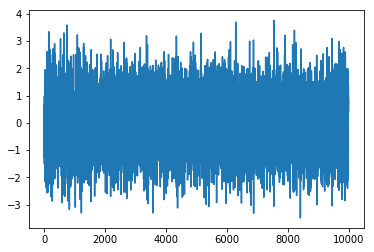

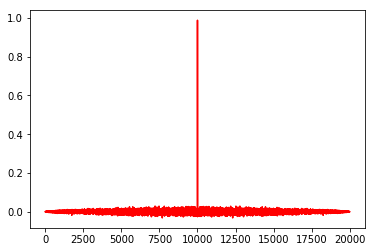

In [69]:
np.random.seed(10000)
x = np.random.normal(size=10000).astype('float')
plt.plot(x)
plt.show()

plt.plot(auto_corr_for_tau(x, normed=False)[1], color='red')
# plt.plot(np.correlate(x, x, 'full'))
plt.show()

In [68]:
o1 = read_signals('../../../data/cw1_otwarte', ['O1'])

2018-10-16 10:37:36,217 - tags_file_reader - ERROR - Couldn`t open tags file.
2018-10-16 10:37:36,218 - data_source - INFO - All data set requested for the first time. Start reading all data from the file...


In [70]:
o2 = read_signals('../../../data/cw1_zamkniete', ['O1'])

2018-10-16 10:38:18,197 - tags_file_reader - ERROR - Couldn`t open tags file.
2018-10-16 10:38:18,198 - data_source - INFO - All data set requested for the first time. Start reading all data from the file...


In [71]:
def filter_signal(signal):
    b_highpass, a_highpass = ss.butter(2, 1 / 1024/2, 'highpass')
    b_lowpass, a_lowpass = ss.butter(4, 40 / 1024/2, 'low')
    b_notch, a_notch = ss.iirnotch(50 / 1024/2, 30)
    filt = np.copy(signal)
    filt = ss.filtfilt(b_notch, a_notch, filt)
    filt = ss.filtfilt(b_highpass, a_highpass, filt)
    filt = ss.filtfilt(b_lowpass, a_lowpass, filt)
    return filt

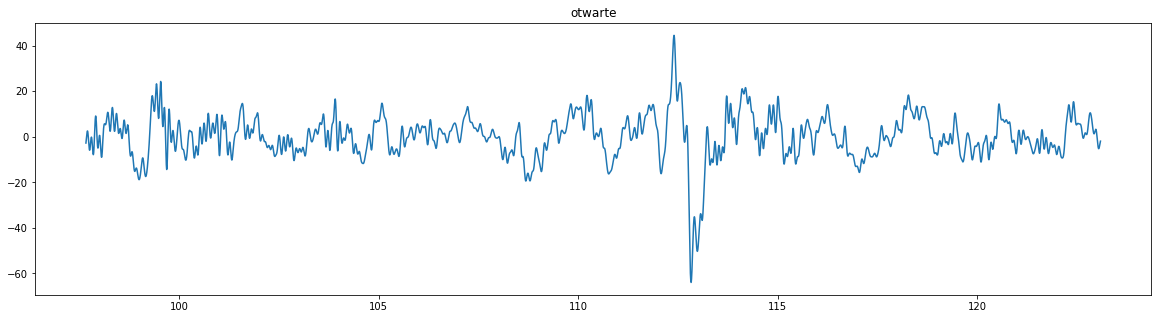

In [72]:
t = np.arange(0, len(o1)) / 1024
filt_o1 = filter_signal(o1)[100000:-500000]

plt.figure(figsize=(20, 5))
plt.plot(t[100000:-500000], filt_o1)
plt.title('otwarte')
plt.show()

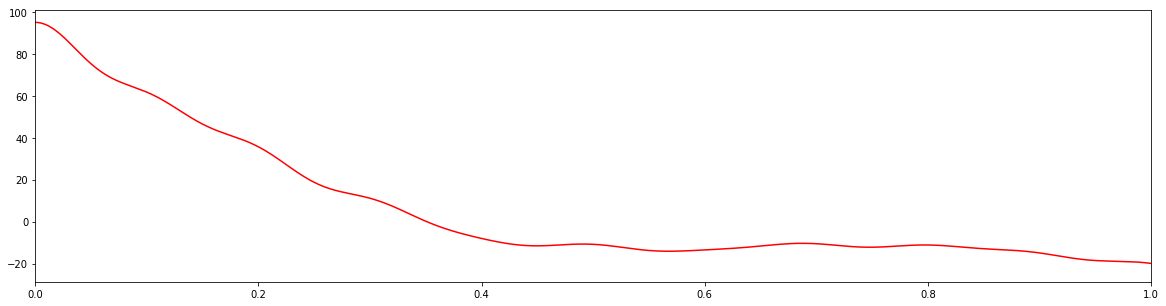

In [75]:
plt.figure(figsize=(20,5))
t, corr = auto_corr_for_tau(filt_o1, normed=False)
plt.plot(t/1024, corr, color='red')
plt.xlim(0,1)
plt.show()

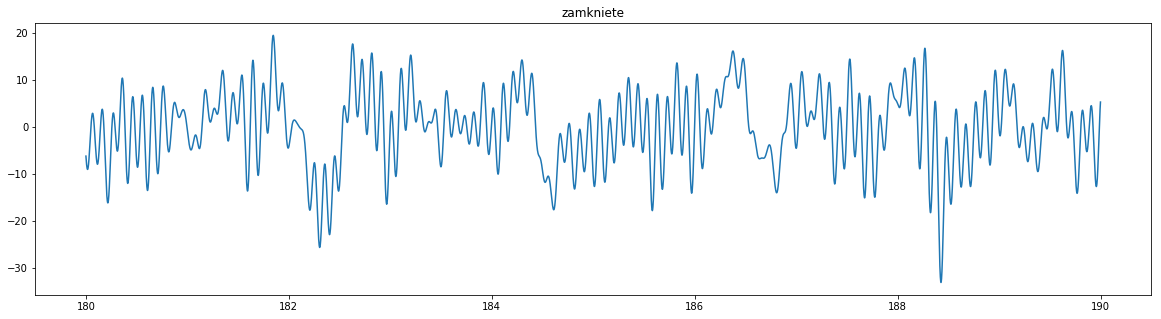

In [76]:
t = np.arange(0, len(o2)) / 1024

start = 3 * 60 * 1024

filt_o2 = filter_signal(o2)[start:start + 1024*10]

plt.figure(figsize=(20, 5))
plt.plot(t[start:start + 1024*10], filt_o2)
plt.title('zamkniete')
plt.show()

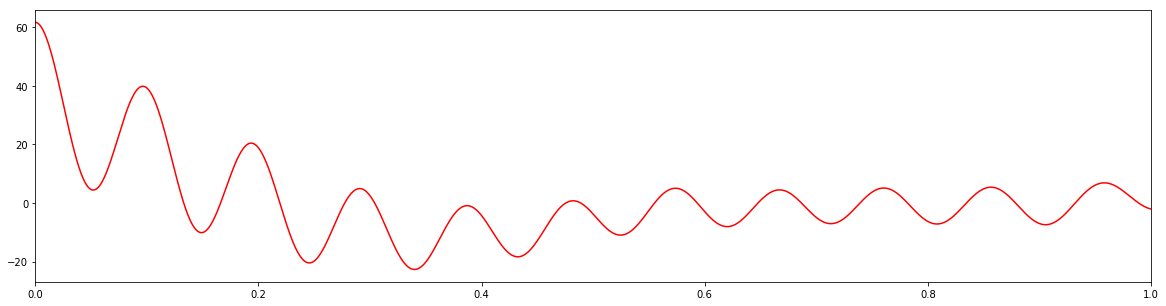

In [78]:
plt.figure(figsize=(20,5))
t, corr = auto_corr_for_tau(filt_o2, normed=False)
plt.plot(t/1024, corr, color='red')
plt.xlim(0,1)
plt.show()

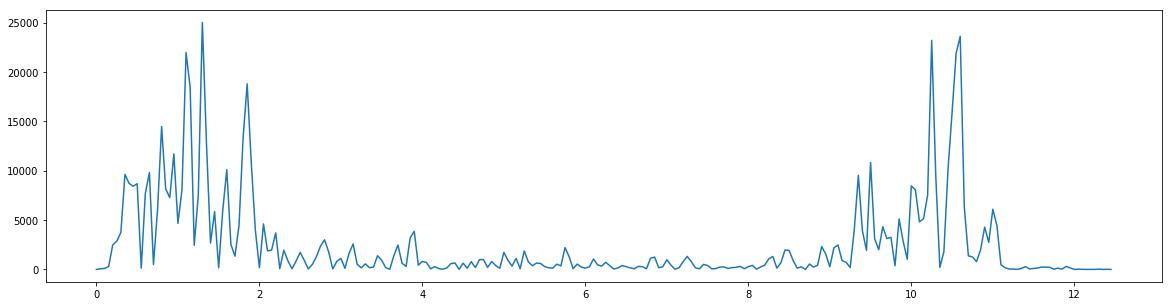

In [79]:
plt.figure(figsize=(20,5))
plt.plot(np.fft.rfftfreq(len(corr), 1/1024)[:250], abs(np.fft.rfft(corr)[:250]))
plt.show()

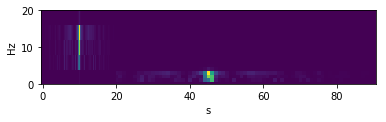

In [80]:
f, t, s = ss.spectrogram(corr, 1024)
plt.pcolormesh(t, f, s)
plt.imshow(s)
plt.ylabel('Hz')
plt.xlabel('s')
plt.ylim(0,20)
plt.show()

In [81]:
F, P = ss.welch(filt_o2, 1024, window='hanning')

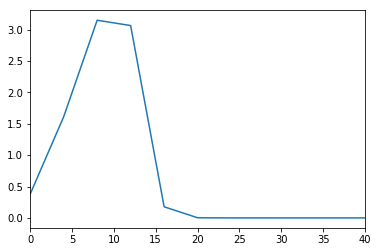

In [82]:
plt.plot(F,P)
plt.xlim(0,40)
plt.show()

# Zadanie 3

In [171]:
channels = ['Fp1', 'Fp2', 'P3', 'Pz', 'P4', 'O1', 'O2']
signals_closed = read_signals('../../../data/cw1_zamkniete', channels)

2018-10-16 12:16:44,901 - tags_file_reader - ERROR - Couldn`t open tags file.
2018-10-16 12:16:44,901 - data_source - INFO - All data set requested for the first time. Start reading all data from the file...


In [172]:
Fs = 1024
nyq = Fs/2
t = np.arange(0, signals_closed.shape[1]) / Fs
start = int(1.5 * 60 * Fs)
end = int(start + 1 * Fs)

In [180]:
np.save('slice', filtered_closed[:, start:end])

In [173]:
filtered_closed = filter_signal(signals_closed)

 6 6 49


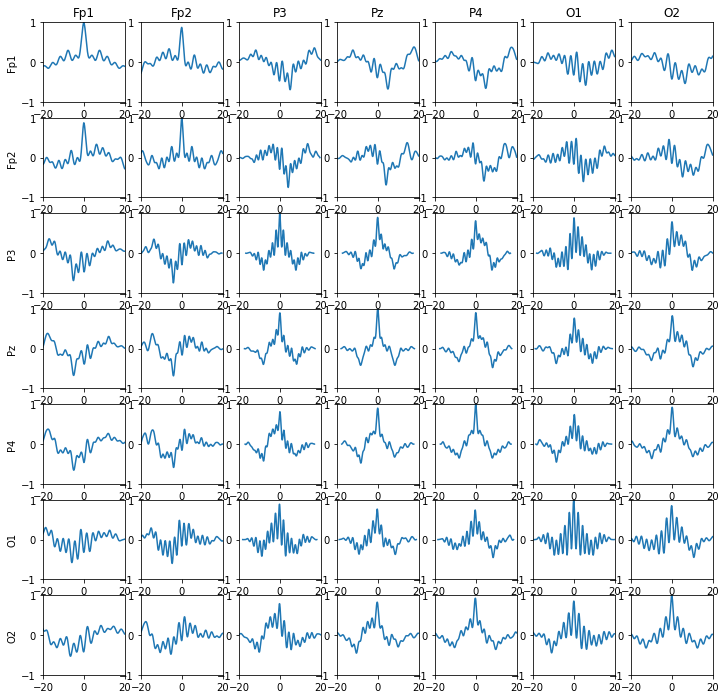

In [97]:
import sys
plt.figure(figsize=(12,12))

for i, x in enumerate(filtered_closed):
    for j, y in enumerate(filtered_closed):
        sys.stdout.write('\r {} {} {}'.format(i, j, (j+1) + (i*filtered_closed.shape[0])))
        
        
        plt.subplot(filtered_closed.shape[0], filtered_closed.shape[0], (j+1) + (i*filtered_closed.shape[0]))
        
        if j == 0:
            plt.ylabel(channels[i])
        if not i:
            plt.title(channels[j])
        t, cov = auto_covar(x[start: end], y[start: end], normed=False) / (np.std(x[start: end]) * np.std(y[start: end]))

        plt.plot(t, cov)
        plt.ylim(-1,1)
        plt.xlim(-20, 20)

sys.stdout.write('\r\n')
plt.show()

In [ ]:
def covar(syg_1, syg_2, tau=0):
    
    if syg_1.shape != syg_2.shape:
        raise ValueError("Can't compare size %d with %d"%(syg_1.shape, syg_2.shape))
    
    syg_1 = syg_1 - np.mean(syg_1)
    syg_2 = syg_2 - np.mean(syg_2)
    
    N = len(syg_1)

    _syg_2 = np.zeros(3*N-2, dtype = 'float')
    _syg_2[N-1:2*N-1] = np.copy(syg_2)

    _syg_1 = np.zeros(3*N-2, dtype= 'float')
    _syg_1[N+(tau-1):2*N + (tau-1)] = np.copy(syg_1)
    
    return np.dot(_syg_1, _syg_2) / (N-1)

def auto_corr_for_tau(syg, normed=False):
    
    tau = np.arange(-len(syg)+1, len(syg))
    f_corr = np.zeros(len(tau))
#     norm = covar(syg, syg)

    for index, t in enumerate(tau):
        f_corr[index] = covar(syg, syg, t)

    if normed:
        f_corr /= norm

    return tau, f_corr

def auto_covar(syg_1, syg_2, normed=False):
    tau = np.arange(-len(syg_1)+1, len(syg_1))
    f_corr = np.zeros(len(tau))

    for index, t in enumerate(tau):
        f_corr[index] = covar(syg_1, syg_2, t)

    return tau, f_corr

# 

 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48
 6 5 48


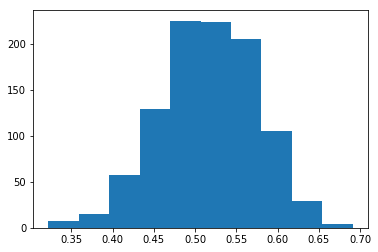

In [140]:
max_covs = []
for i in range(1000):
    max_partial_covs = []
    for i, x in enumerate(filtered_closed):
        for j, y in enumerate(filtered_closed):
            if i != j:
                sys.stdout.write('\r {} {} {}'.format(i, j, (j+1) + (i*filtered_closed.shape[0])))
                np.random.shuffle(x)
                np.random.shuffle(y)

                cov = np.correlate(x[start: end] - np.mean(x[start: end]), y[start: end] - np.mean(y[start: end]), 'full') / (len(x[start: end]) - 1)
#                 norm = np.std(x[start: end]  - np.mean(x[start: end])) * np.std(y[start: end]  - np.mean(y[start: end]))
#                 cov = cov / norm
                max_partial_covs.append(max(cov))

    sys.stdout.write('\r\n')            
    max_covs.append(max(max_partial_covs))
plt.hist(max_covs)
plt.show()

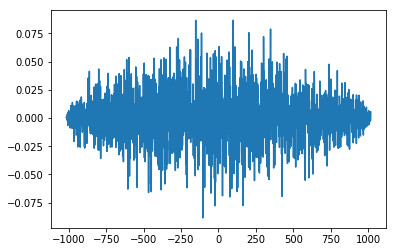

In [115]:
x = np.random.normal(size=1024)
y = np.random.normal(size=1024)
t, corr = auto_covar(x, y) / (np.std(x) * np.std(y))

plt.plot(t, corr)

In [141]:
_m_covs = max_covs

 999

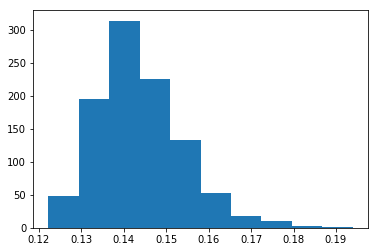

In [185]:
import itertools

max_covs = []


_filtered_closed = np.array(list(map(lambda x: filtered_closed[x, start: end] - np.mean(filtered_closed[x]), range(len(filtered_closed)))))


combinations = list(itertools.combinations(_filtered_closed , 2))

all_covs = np.array([])

for k in range(1000):
    sys.stdout.write('\r {}'.format(k))
    max_partial_covs = []
    
    for combination in combinations:
            
            x = combination[0]
            y = combination[1]
            
#             print(x)
            
            np.random.shuffle(x)
            np.random.shuffle(y)

            norm = np.std(x) * np.std(y)
            
            cov = np.correlate(x, y, 'full') / (len(x) - 1)
            
#             all_covs = np.concatenate((all_covs, cov))
            
            max_partial_covs.append(max(cov) / norm)
          
    max_covs.append(max(max_partial_covs))

plt.hist(max_covs)
plt.show()

# plt.hist(all_covs)
# plt.show()

In [186]:
import scipy.stats as st

print(st.scoreatpercentile(max_covs, 99.5))
print(st.scoreatpercentile(max_covs, 0.5))

0.17555173113613173
0.12448257222223202


 6 6 49


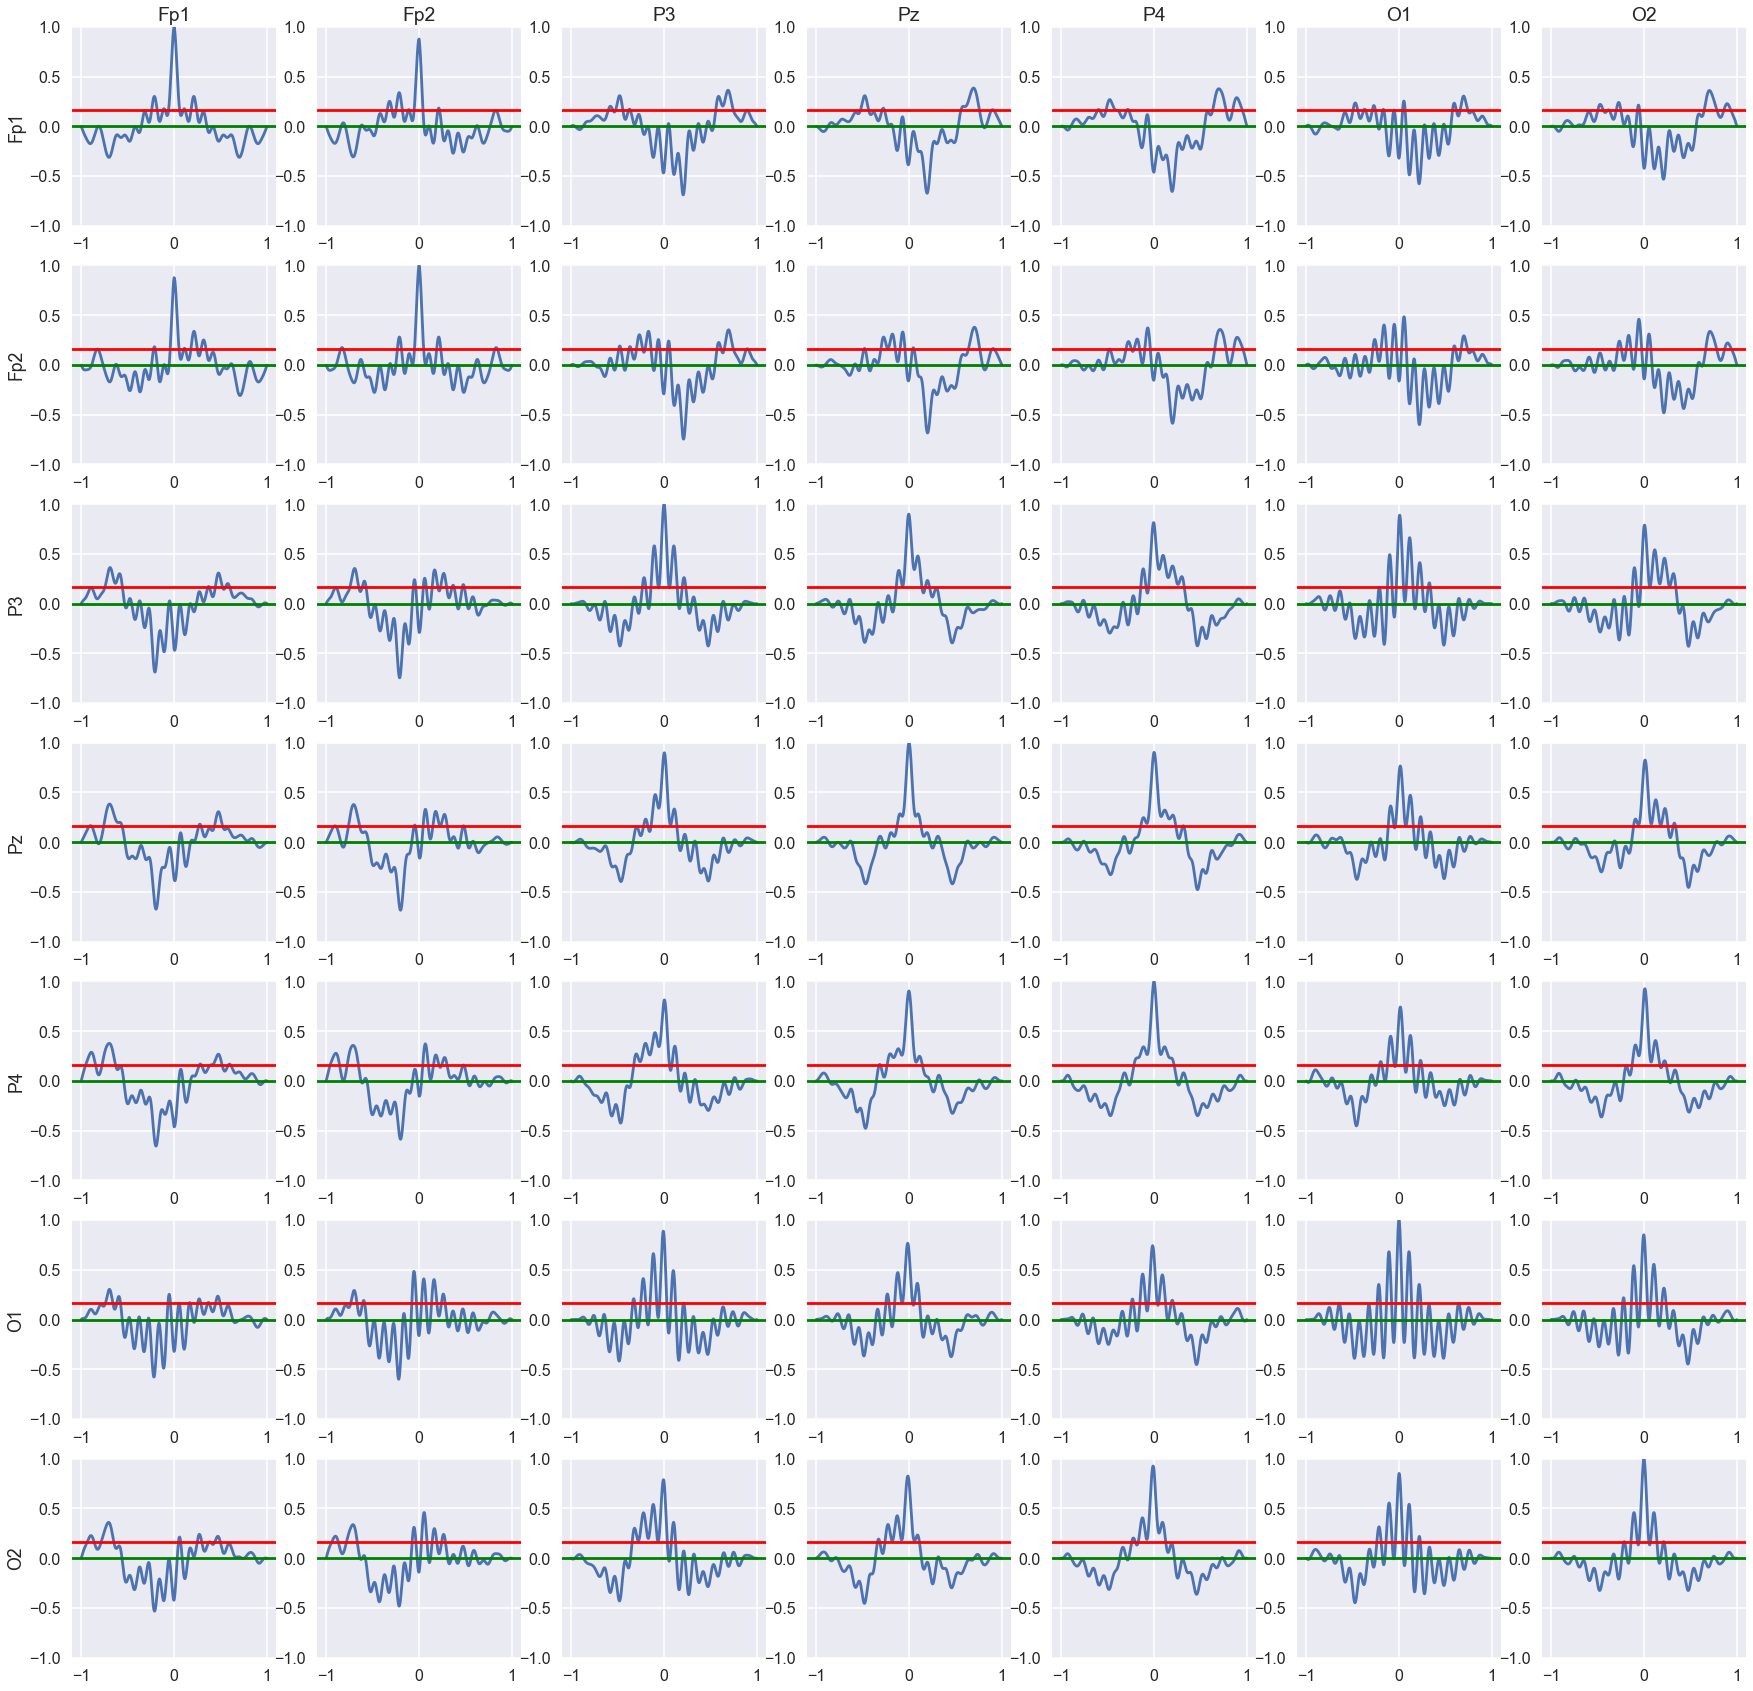

In [287]:
import sys
plt.figure(figsize=(30,30))

high_perc = st.scoreatpercentile(max_covs, 95)

for i, x in enumerate(filtered_closed):
    for j, y in enumerate(filtered_closed):
        sys.stdout.write('\r {} {} {}'.format(i, j, (j+1) + (i*filtered_closed.shape[0])))
        
        plt.subplot(filtered_closed.shape[0], filtered_closed.shape[0], (j+1) + (i*filtered_closed.shape[0]))
        
        if j == 0:
            plt.ylabel(channels[i])
        if not i:
            plt.title(channels[j])
        t, cov = auto_covar(x[start: end], y[start: end], normed=False)
        cov /= (np.std(x[start: end]) * np.std(y[start: end]))
        t = t / Fs
        plt.plot(t, cov)
        plt.axhline(high_perc, c='r')
        plt.axhline(0, c='g')
        
        plt.ylim(-1,1)

sys.stdout.write('\r\n')
plt.show()

# Zadanie 4

a)

In [295]:
import itertools
from numba import jit
from tqdm import tqdm
import math
import seaborn as sns
sns.set()
sns.set_context('poster')

def func(f, gamma, tau, d_tau=1./1024):
    '''
        f - f requency at which checking
        gamma - covariance of two signals
        tau - index representing time shift
    '''
    return gamma[tau] * np.exp(-2 * np.pi * np.complex(0, 1) * f * tau * d_tau)

@jit
def integral(f, gamma, d_tau=1./1024):
    c = 0
    for tau in range(len(gamma)):
        c += func(f, gamma, tau, d_tau) * d_tau
    
    return c

@jit
def spectrum(gamma, Fs=1024, low=0, high=512):
    f_max = high + 1
    F = np.empty(f_max - low)
    F_freq = np.arange(f_max - low)
    
    for index, f in enumerate(F_freq):
        F[index] = integral(f, gamma, 1./Fs)
    
    return F_freq, F

def co_spectrum(x, y, low=0, high=512):

            norm = np.std(x) * np.std(y)

            cov = np.correlate(x, y, 'full') / (len(x) - 1)
            
            cov /= norm

            F_freq, F = spectrum(cov, low=low, high=high)
            
            return F_freq, abs(F), np.angle(F)

            
def plot_spectrum():
    _filtered_closed = np.array(list(map(lambda x: filtered_closed[x, start: end] - np.mean(filtered_closed[x]), range(len(filtered_closed)))))

    combinations = list(itertools.combinations_with_replacement(range(filtered_closed.shape[0]) , 2))

    plt.figure(figsize=(25,25))
    plt.tight_layout()

    for combination in tqdm(combinations):

        i = combination[0]
        j = combination[1]

        x = _filtered_closed[i]
        y = _filtered_closed[j]
        F_freq, F, _ = co_spectrum(x, y, high=20)

        plt.subplot(filtered_closed.shape[0], filtered_closed.shape[0], (j+1) + (i*filtered_closed.shape[0]))

        xticks = []
        yticks = []

        if not i:
            plt.title(channels[j])
            xticks = plt.xticks()[0]
            yticks = plt.yticks()[0]

        if j == 0 and i == 0:
            plt.ylabel(channels[i])
            xticks = plt.xticks()[0]



        plt.plot(F_freq, F)
        plt.ylim(0, 0.3)
        plt.xticks(np.arange(0, 30, 10))

        plt.grid()

        if j != i:
            plt.subplot(filtered_closed.shape[0], filtered_closed.shape[0], (i+1) + (j*filtered_closed.shape[0]))

            yticks = []

            if not i:
                plt.ylabel(channels[j])
                yticks = plt.yticks()[0]
            plt.plot(F_freq, F)
            plt.ylim(0, 0.3)
            plt.xticks(np.arange(0, 30, 10))
            plt.grid()


    plt.show()
    
def plot_phase():
    _filtered_closed = np.array(list(map(lambda x: filtered_closed[x, start: end] - np.mean(filtered_closed[x]), range(len(filtered_closed)))))

    combinations = list(itertools.combinations_with_replacement(range(filtered_closed.shape[0]) , 2))

    plt.figure(figsize=(25,25))
    plt.tight_layout()

    for combination in tqdm(combinations):

        i = combination[0]
        j = combination[1]

        x = _filtered_closed[i]
        y = _filtered_closed[j]
        F_freq, _, phase = co_spectrum(x, y, high=20)

        plt.subplot(filtered_closed.shape[0], filtered_closed.shape[0], (j+1) + (i*filtered_closed.shape[0]))

        xticks = []
        yticks = []

        if not i:
            plt.title(channels[j])
            xticks = plt.xticks()[0]
            yticks = plt.yticks()[0]

        if j == 0 and i == 0:
            plt.ylabel(channels[i])
            xticks = plt.xticks()[0]



        plt.plot(F_freq, phase)
        plt.ylim(-2*np.pi, 2*np.pi)
        plt.xticks(np.arange(0, 30, 10))

        plt.grid()

        if j != i:
            plt.subplot(filtered_closed.shape[0], filtered_closed.shape[0], (i+1) + (j*filtered_closed.shape[0]))

            yticks = []

            if not i:
                plt.ylabel(channels[j])
                yticks = plt.yticks()[0]
            plt.plot(F_freq, -phase)
            plt.ylim(-2*np.pi, 2*np.pi)
            plt.xticks(np.arange(0, 30, 10))
            plt.grid()


    plt.show()


100%|██████████| 28/28 [00:12<00:00,  2.43it/s]


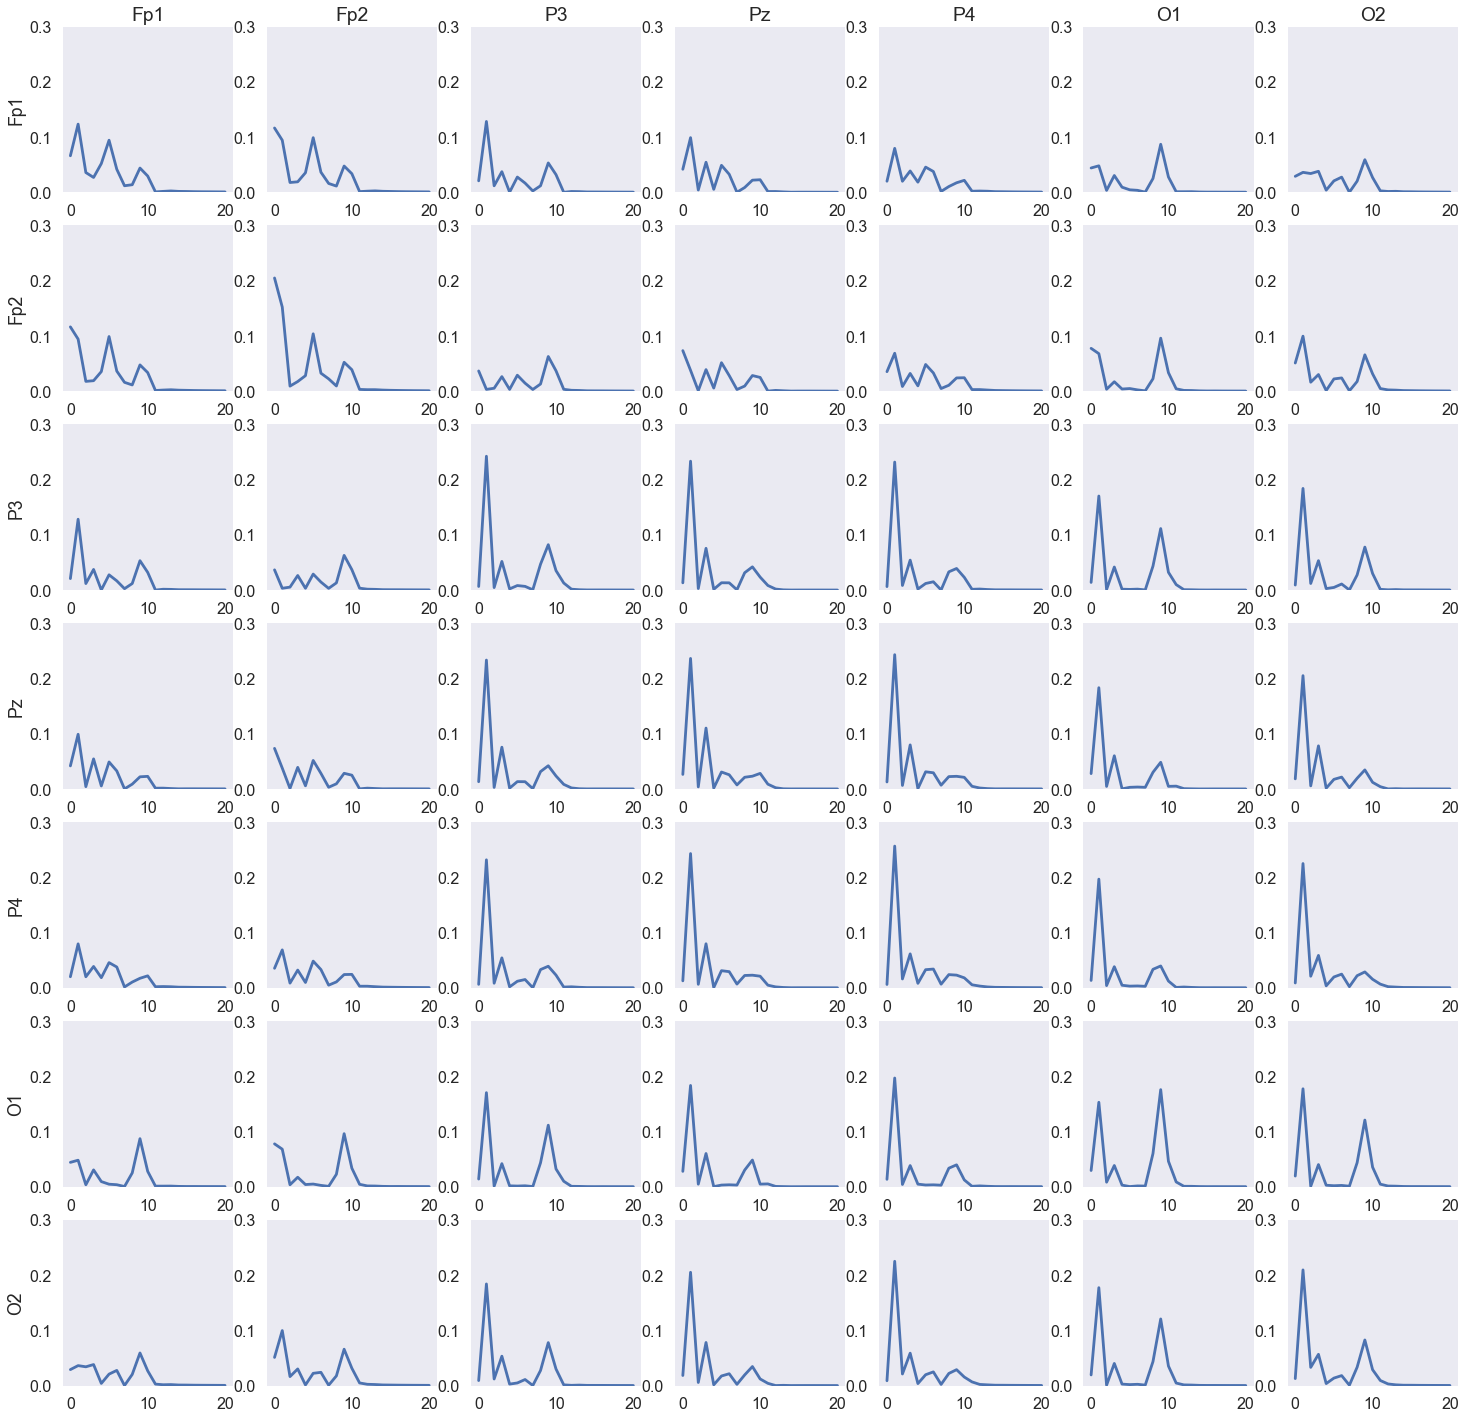

In [296]:
plot_spectrum()

100%|██████████| 28/28 [00:12<00:00,  2.45it/s]


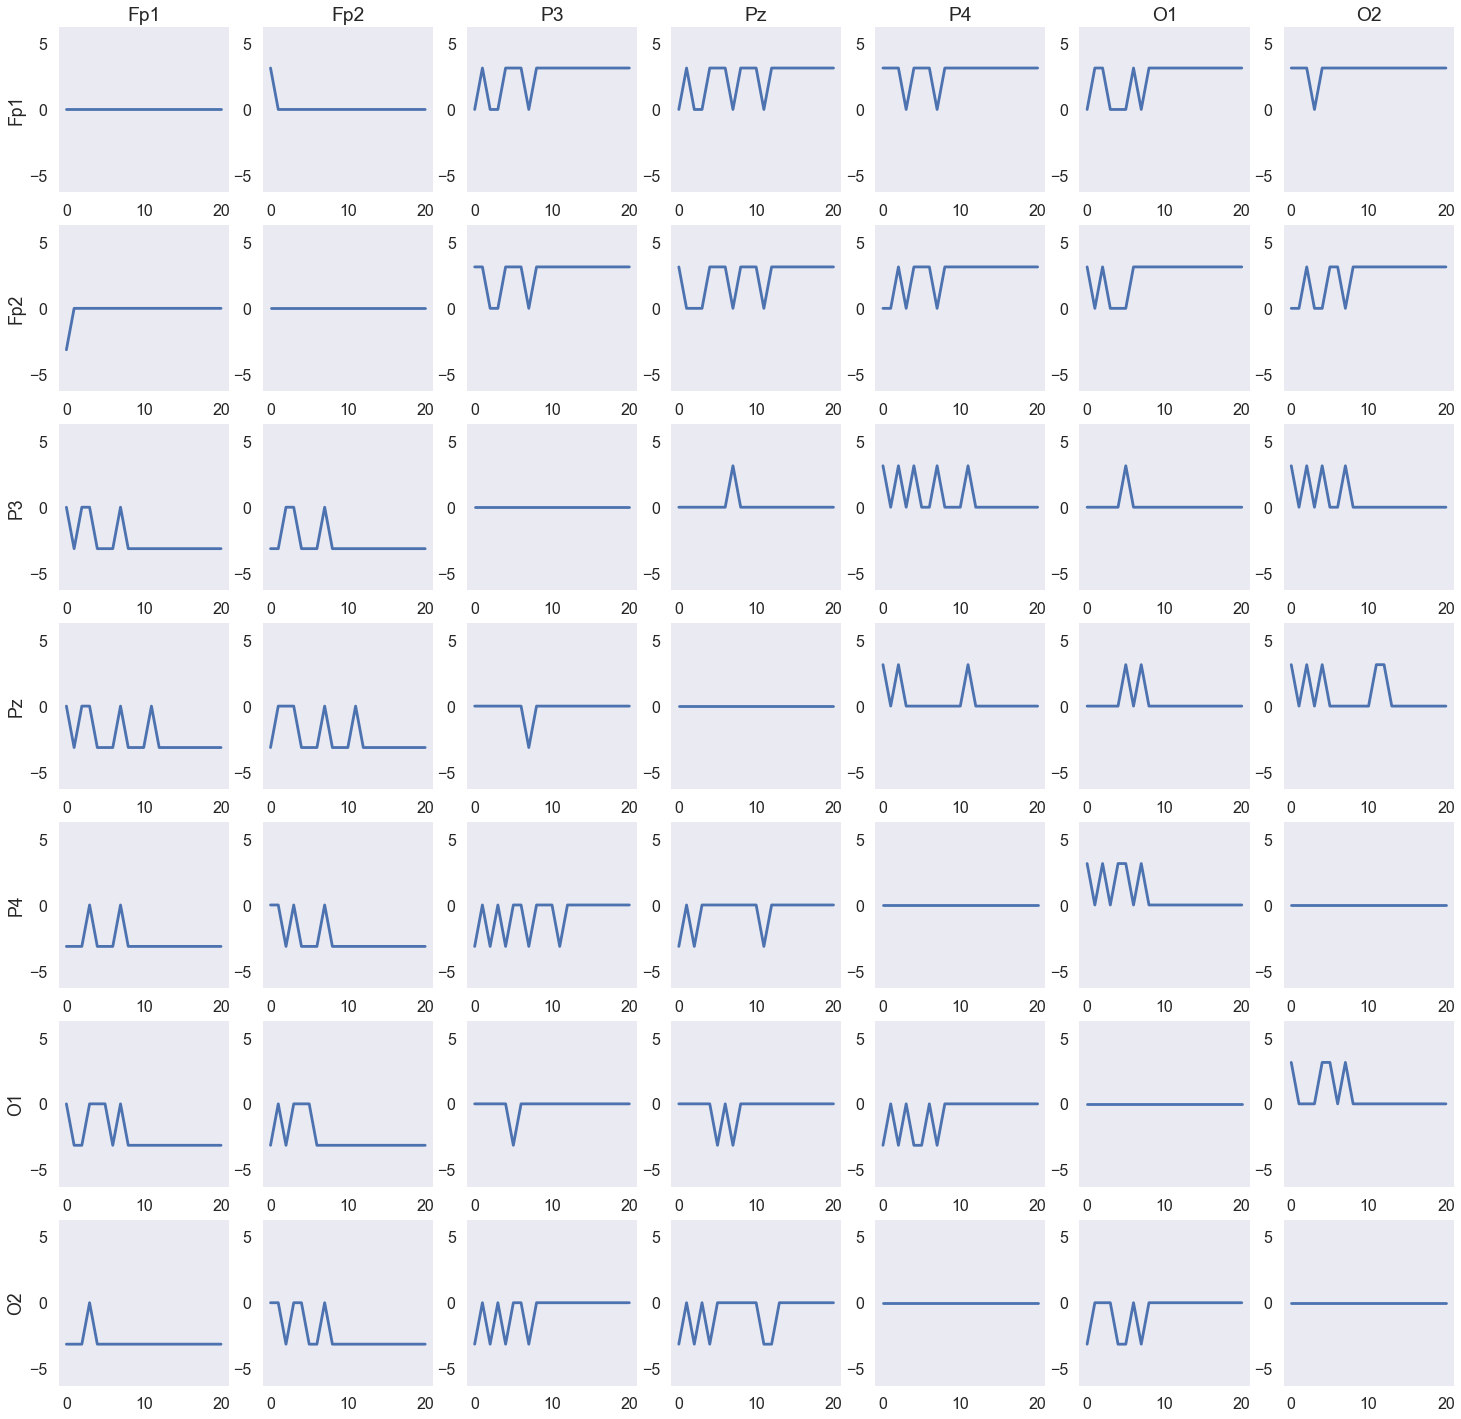

In [297]:
plot_phase()